In [1]:
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.size'] = 9
import json
import numpy as np

In [2]:
with open('csvs/sahi_comparison_metrics.json') as f:
    data = json.load(f)

print(data['whole']['results_dict'])
print(data['tiling']['results_dict'])
data['tiling'].keys()

{'metrics/precision(B)': 0.9859350328964246, 'metrics/recall(B)': 0.9346513021971752, 'metrics/mAP50(B)': 0.9910454983130564, 'metrics/mAP50-95(B)': 0.8520891150573735, 'fitness': 0.8659847533829419}
{'metrics/precision(B)': 0.9905023306517676, 'metrics/recall(B)': 0.9807746722256381, 'metrics/mAP50(B)': 0.9941097249426356, 'metrics/mAP50-95(B)': 0.8534174353183461, 'fitness': 0.8674866642807751}


dict_keys(['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'speed', 'results_dict'])

In [6]:
def get_precision_recall_at_conf(data, conf_value=0.5):
    results = {}
    for mode in ["tiling", "whole"]:
        mode_data = data.get(mode, {})
        precision_curve = mode_data.get("Precision-Confidence(B)", {})
        recall_curve = mode_data.get("Recall-Confidence(B)", {})

        x_prec = precision_curve.get("x", [])
        y_prec = precision_curve.get("y", [])
        x_rec = recall_curve.get("x", [])
        y_rec = recall_curve.get("y", [])

        if x_prec and y_prec:
            idx_p = min(range(len(x_prec)), key=lambda i: abs(x_prec[i] - conf_value))
            precision = y_prec[idx_p]
        else:
            precision = None

        if x_rec and y_rec:
            idx_r = min(range(len(x_rec)), key=lambda i: abs(x_rec[i] - conf_value))
            recall = y_rec[idx_r]
        else:
            recall = None

        results[mode] = {"conf": conf_value, "precision": precision, "recall": recall}
    return results

results_at_05 = get_precision_recall_at_conf(data, 0.5)
results_at_05


{'tiling': {'conf': 0.5,
  'precision': 0.9951661838031974,
  'recall': 0.9680690114457078},
 'whole': {'conf': 0.5,
  'precision': 0.9962175650074208,
  'recall': 0.8779361597305105}}

(0.7, 1.0)

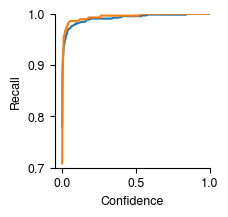

In [135]:
fig = plt.figure(figsize=(2, 2))
for key in data.keys():
    plt.plot(data[key]['Precision-Confidence(B)']['x'], data[key]['Precision-Confidence(B)']['y'])
plt.xlabel('Confidence')
plt.xlim(-.05,1)
plt.ylabel('Recall')
plt.ylim(0.7,1)

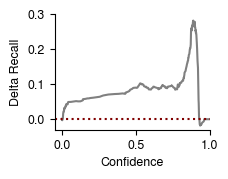

In [ ]:

tiling_recall = np.array(data['tiling']['Recall-Confidence(B)']['y'])
whole_recall  = np.array(data['whole']['Recall-Confidence(B)']['y'])
delta_list = tiling_recall - whole_recall

fig = plt.figure(figsize=(2, 1.5))
plt.plot(data['tiling']['Recall-Confidence(B)']['x'], delta_list, color='gray')
plt.xlabel('Confidence')
plt.xlim(-.05,1)
plt.ylabel('Delta Recall')
plt.ylim(-.03,0.3)
plt.hlines(0,-.05, 1, linestyles=':', colors='maroon')

(0.0, 1.0)

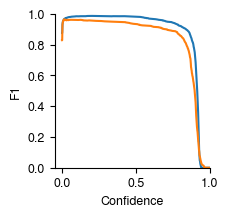

In [113]:
fig = plt.figure(figsize=(2, 2))
for key in data.keys():
    plt.plot(data[key]['F1-Confidence(B)']['x'], data[key]['F1-Confidence(B)']['y'])
plt.xlabel('Confidence')
plt.xlim(-.05,1)
plt.ylabel('F1')
plt.ylim(0,1)

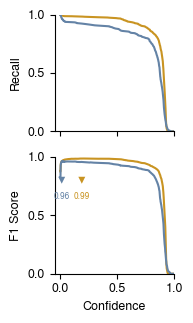

In [133]:
colors = ["#C99422", "#6483A6"]

fig, ax = plt.subplots(2,1, sharex=True, figsize = (2,3.3))
for i, key in enumerate(data.keys()):
    color = colors[i]
    ax[0].plot(data[key]['Recall-Confidence(B)']['x'], data[key]['Recall-Confidence(B)']['y'], color=color)
    ax[1].plot(data[key]['F1-Confidence(B)']['x'], data[key]['F1-Confidence(B)']['y'], color=color)

ax[0].set_ylabel('Recall')

ax[1].set_ylabel('F1 Score')
ax[1].set_xlabel('Confidence')

for axis in ax:
    axis.set_ylim(0,1)
    axis.set_yticks([0, 0.5, 1])
    axis.set_xlim(-.05,1)
    axis.set_xticks([0, 0.5, 1])

for i, key in enumerate(data.keys()):
    color = colors[i]

    x = data[key]['F1-Confidence(B)']['x']
    y = data[key]['F1-Confidence(B)']['y']

    peak_idx = np.argmax(y)
    peak_x = x[peak_idx]
    peak_y = y[peak_idx]

    ax[1].scatter(peak_x, 0.8, color=color, marker = 'v', edgecolor='none', zorder=5, s=25)

    ax[1].text(
        peak_x, 0.7,
        f"{peak_y:.2f}", color=color, fontsize=6,
        va='top', ha='center'
    )

plt.tight_layout()

plt.savefig('figs/recall_f1.svg', format='svg')